In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Data_Sets/AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


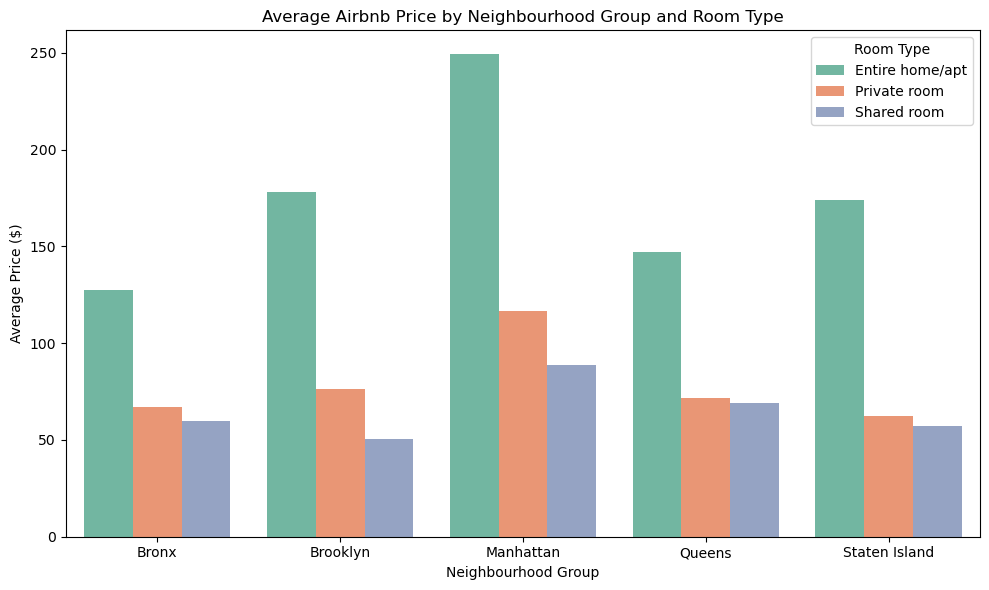

In [7]:
# Calculate average price
avg_price = df.groupby(
    ["neighbourhood_group", "room_type"]
)["price"].mean().reset_index()

# Plot multiple bar graph
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_price,
    x="neighbourhood_group",
    y="price",
    hue="room_type",
    palette="Set2"
)

plt.title("Average Airbnb Price by Neighbourhood Group and Room Type")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price ($)")
plt.legend(title="Room Type")

plt.tight_layout()
plt.show()


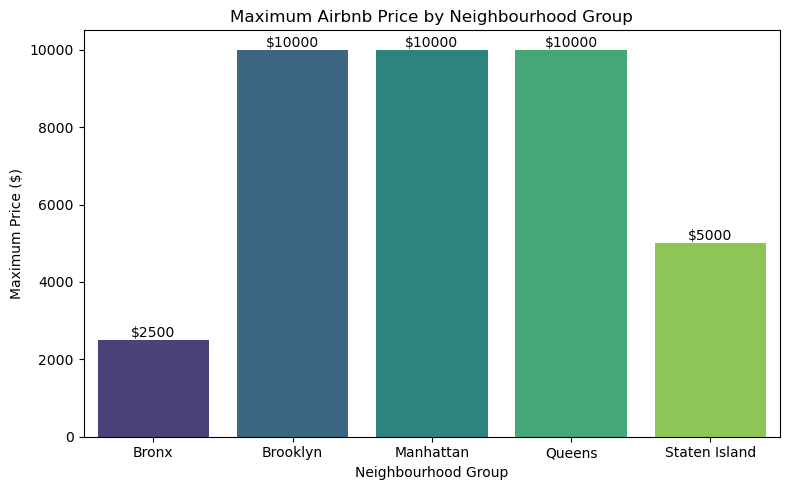

In [8]:
# Calculate maximum price by neighbourhood_group
max_price = df.groupby("neighbourhood_group")["price"].max().reset_index()

# Plot bar graph
plt.figure(figsize=(8,5))
sns.barplot(
    data=max_price,
    x="neighbourhood_group",
    y="price",
    hue="neighbourhood_group",   # assign hue
    palette="viridis",
    legend=False                 # remove legend
)

plt.title("Maximum Airbnb Price by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Maximum Price ($)")

# Add price labels on bars
for index, value in enumerate(max_price["price"]):
    plt.text(index, value, f"${value}", ha="center", va="bottom")

plt.tight_layout()
plt.show()
